In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
#load and explore
url='https://raw.githubusercontent.com/gabminamedez/spotify-data/refs/heads/master/data.csv'
df=pd.read_csv(url)
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [3]:
df.shape

(169909, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

In [5]:
#Data cleaning
df=df.drop_duplicates()
df.isna().sum()

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [6]:
#Descriptive Analysis
df.select_dtypes(include='number').agg(['mean','median','std'])

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
mean,231406.158973,1977.223231,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,0.094058,116.948017,0.532095,0.708556,5.200519,31.556610,0.084863
median,208600.000000,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.778000,0.544000,1.000000,5.000000,33.000000,0.000000
std,121321.923219,25.593168,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,0.149937,30.726937,0.262408,0.454429,3.515257,21.582614,0.278679


In [7]:
most_popular = df.loc[df['popularity'].idxmax()]
least_popular = df.loc[df['popularity'].idxmin()]

In [8]:
print("\nMost popular song:")
print(most_popular[['artists', 'name', 'popularity']])

print("\nLeast popular song:")
print(least_popular[['artists', 'name', 'popularity']])


Most popular song:
artists        ['The Weeknd']
name          Blinding Lights
popularity                100
Name: 87942, dtype: object

Least popular song:
artists               ['Carl Woitschach']
name          Singende Bataillone 1. Teil
popularity                              0
Name: 0, dtype: object


In [9]:
#Grouping & Aggregation
if 'genre' in df.columns:
    avg_popularity=df.groupby('genre')['popularity'].mean()
    print("\nAverage popularity by genre:")
    print(avg_popularity_by_genre.head(10))
else:
    print("\nNo genre column found in dataset")


No genre column found in dataset


In [10]:
#Visualization
top_artist=df['artists'].value_counts().head(10)

Text(0, 0.5, 'Number of Songs')

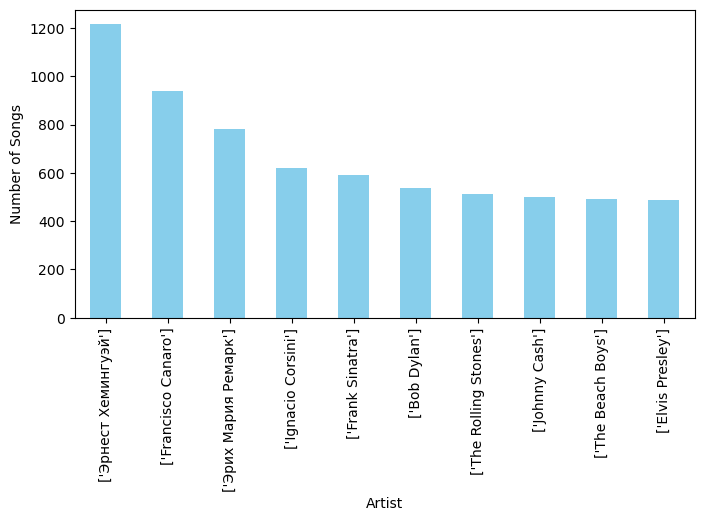

In [11]:
top_artist.plot(kind='bar',color='skyblue',figsize=(8,4))
plt.xlabel('Artist')
plt.ylabel('Number of Songs')

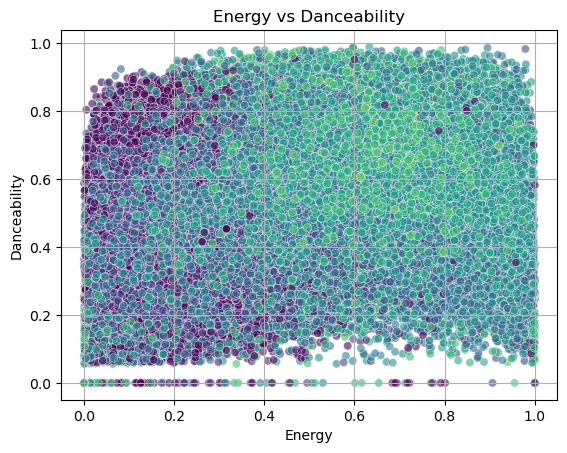

In [12]:
sns.scatterplot(
    x='energy', y='danceability',
    data=df, hue='popularity',
    palette='viridis', alpha=0.6,
    legend=False
)
plt.title('Energy vs Danceability')
plt.xlabel('Energy') 
plt.ylabel('Danceability') 
plt.grid(True)

Text(0, 0.5, 'Count')

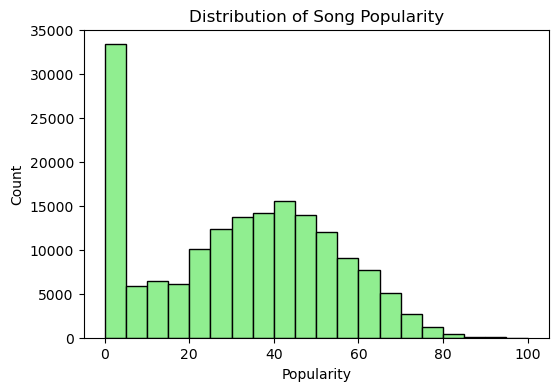

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df['popularity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')


In [14]:
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
